<a href="https://colab.research.google.com/github/ferzaralv/Simulaci-n-II/blob/main/MC_Acierto_y_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Acierto y Error

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

In [ ]:
X1=Coordenada X
X2=Coordenada Y

**PASO 2**. Formule la distribución de probabilidad de cada variable.


|      |**X1**|**X2**|
|------|-------|----------|
|f(x)|   U(a,b)      |  U(a,b)      |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|      |**X1**|**X2**|
|------|-------|----------|
|f(x)  |    U(a,b)   |   U(a,b)       |
|F(x)  |    U(a,b)   |    U(a,b)      |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|           |**X1**|**X2**|
|-----------|-------|----------|
|f(x)       |U       |U          |
|F(x)       |U       |U          |
|Intervalos | (a,b)      |  (a,b)        |

**PASO 5**. Genere números aleatorios.

In [ ]:
from random import random as rd

x=rd()
y=rd()


**PASO 6**. Establecer la fórmula.

Si (x1,x2) < f(x1) = Acierto

Si (x1,x2) > f(x1) = Error

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [14]:
import numpy as np
from random import random as rd
import matplotlib.pyplot as plt

In [48]:
from math import sqrt
def aprox(n):
    aciertos = 0
    for i in range(n):
        x1 = rd()
        x2 = rd()

        #Definir la función de la cual queremos saber la integral

        if x2 < pow(x1,2) :
            aciertos += 1
    return (aciertos/n)


In [49]:
def experimento(iteraciones):
    i = 0
    favorables=0
    Lista = []

    for i in range(iteraciones):
      appi=aprox(i+1)
      Lista.append(appi)

    return Lista


In [50]:
exp = experimento(2000)

In [51]:
np.mean(exp)

0.33409802835112473

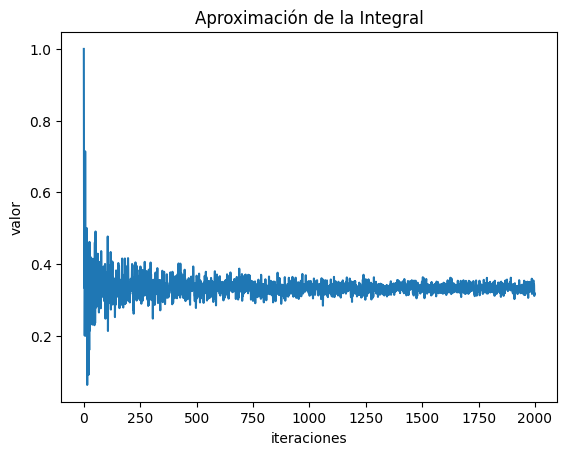

In [52]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('valor')
plt.title('Aproximación de la Integral')
plt.show()

**PASO 8**. Replique el modelo.

In [53]:
def aproximacion(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [54]:
simulacion = aproximacion(50)

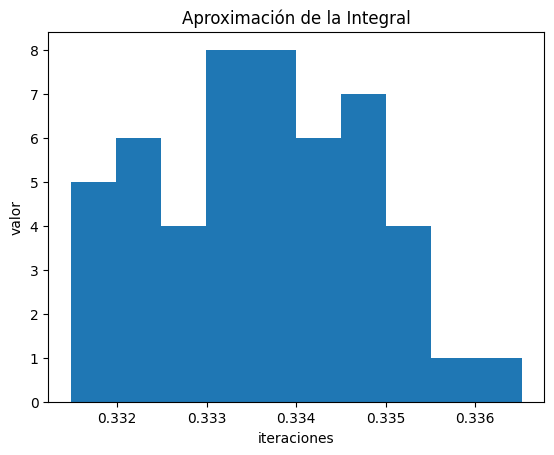

In [55]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('valor')
plt.title('Aproximación de la Integral')
plt.show()

**PASO 9**. Aproxime el número pi con el método de montecarlo.

In [56]:
mu=np.mean(simulacion)
var=np.var(simulacion)
sigma=np.std(simulacion)

print(mu,var,sigma)

0.3336387050106544 1.385071227298184e-06 0.0011768904907841612


**PASO 10**. Halle el intervalo de confianza para el valor de pi, con un nivel de confianza del $95 \%$.

In [57]:
from scipy.stats import norm

prob=1-.95

z0=norm.ppf(prob/2, mu,sigma)
z1=norm.ppf(1-(prob/2), mu,sigma)

print("Intervalo de confianza = (", z0, ", ", z1, ")")

Intervalo de confianza = ( 0.3313320420349698 ,  0.335945367986339 )
